# Polls of the 2012 election Data

The project analyzes a dataset of the the 2012 election from HuffPost Pollster to find the answer for the following questions:
    1. Who was being polled and what was their party affiliation?
    2. Did the poll results favor Romney or Obama?
    3. How do undecided voters effect the poll?
    4. Can we account for the undecided voters?
    5. How did voter sentiment change over time?
    6. Can we see an effect in the polls from the debates?

Let's go ahead and start with our standard imports:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

from __future__ import division
import requests 
from io import StringIO

## Request the data from the web

In [4]:
url='http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'
source=requests.get(url).text

df_data=StringIO(source)
df = pd.read_csv(df_data)
df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,PPP (D),2009-07-15,2009-07-16,2010-11-08T11:02:37Z,577.0,Registered Voters,Automated Phone,49.0,40.0,11.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
582,PPP (D),2009-06-12,2009-06-16,2010-11-08T10:58:00Z,638.0,Registered Voters,Automated Phone,48.0,40.0,12.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
583,PPP (D),2009-05-14,2009-05-18,2010-11-08T10:49:08Z,1000.0,Registered Voters,Automated Phone,53.0,35.0,12.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
584,PPP (D),2009-04-17,2009-04-19,2010-11-08T10:45:18Z,686.0,Registered Voters,Automated Phone,50.0,39.0,11.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1


##     1. Who was being polled and what was their party affiliation?


In [5]:
df['Affiliation'].value_counts()

None     480
Dem       93
Rep        9
Other      4
Name: Affiliation, dtype: int64

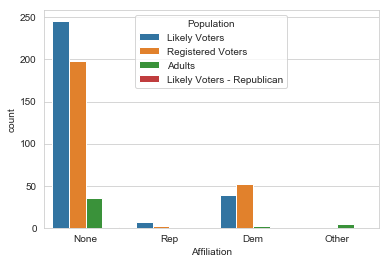

In [6]:
sns.countplot('Affiliation',data=df,hue='Population')
plt.savefig('01_affiliation.png',dpi=200)

##     2. Did the poll results favor Romney or Obama? and
##     3. How do undecided voters effect the poll?

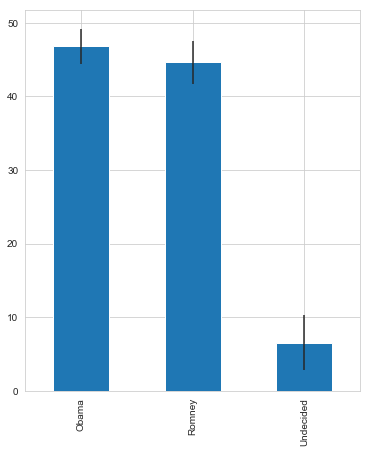

In [19]:
df[['Obama','Romney','Undecided']].mean().plot(figsize=(6,7),kind='bar',yerr=df[['Obama','Romney','Undecided']].std())
plt.savefig('01_pool_results.png',dpi=200)

So the undecided factor is decisive!

## 5. How did voter sentiment change over time?

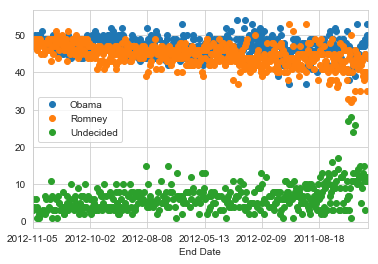

In [8]:
# Quick plot of sentiment in the polls versus time.
df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',linestyle='')
plt.savefig('01_sentiment_over_time.png',dpi=200)

##     6. Can we see an effect in the polls from the debates?

### The difference between Obama and Romney

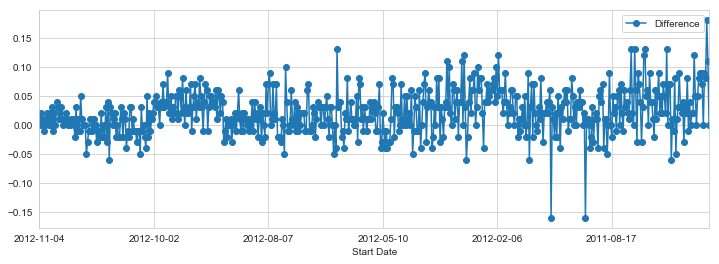

In [9]:
# Create new a column called 'Difference'
df['Difference'] = (df['Obama']-df['Romney'])/100

## Plot the Difference

fig = df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-')
plt.savefig('01_Difference.png',pdi=200)

### The difference right after the debates: Oct 3rd, Oct 11, and Oct 22nd

In [10]:
# For timestamps
from datetime import datetime

In [11]:
# Groupby 'Start Date'

df1 = df.groupby('Start Date').mean()#as_index=False).mean()

In [12]:
# convert the date to real date
df1.index=pd.to_datetime(df1.index)

In [13]:
# create a dataframe for Oct only
df2=df1.loc['2012-10-01':'2012-10-31']
df2.head()

,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
Start Date,,,,,,,,
2012-10-01,1746.0,48.500000,46.000000,3.0,NaN,NaN,1,0.025000
2012-10-02,590.0,49.000000,45.000000,6.0,NaN,NaN,1,0.040000
2012-10-04,1061.5,45.833333,48.666667,6.0,NaN,NaN,1,-0.028333
2012-10-05,1000.0,46.000000,46.500000,7.0,1.0,NaN,1,-0.005000
2012-10-06,895.0,46.500000,45.500000,4.5,3.0,NaN,1,0.010000


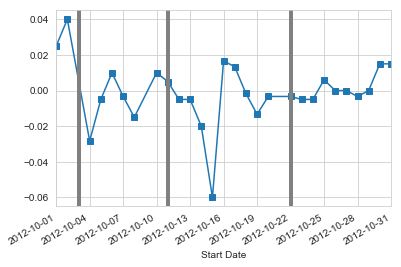

In [16]:
df2['Difference'].plot(marker='s',linestyle='-')
plt.savefig('01_result_after_debates.png',dpi=200)
plt.axvline(x='2012-10-03', linewidth=4, color='grey')
plt.axvline(x='2012-10-11', linewidth=4, color='grey')
plt.axvline(x='2012-10-22', linewidth=4, color='grey')